#📌 Extracción

**1. Fase de Extracción**

En esta etapa inicial, realizamos la carga de la base de datos cruda proporcionada por el equipo de sistemas de Telecom X. El objetivo es obtener una primera visión de la estructura de los datos antes de aplicar cualquier regla de negocio.



**1.1 Actividades realizadas:**

* **Carga de datos:** Importación del archivo fuente (formato JSON) que contiene la información histórica de los clientes.

* **Inspección de integridad:** Verificación de las dimensiones del dataset (7267 registros y 6 columnas iniciales).

* **Identificación de estructuras anidadas:** Se detectó que la información clave sobre servicios y cuentas se encuentra "encapsulada" en diccionarios (objetos JSON), lo que define la necesidad de una fase de normalización posterior.

In [3]:
import pandas as pd
import requests

url = "https://raw.githubusercontent.com/ingridcristh/challenge2-data-science-LATAM/main/TelecomX_Data.json"

try:
    response = requests.get(url)
    if response.status_code == 200:
        # Aquí creamos el DataFrame
        datos_telecom = pd.DataFrame(response.json())
        print("✅ Extracción completada")
    else:
        print("❌ Error al conectar")
except:
    print("❌ Error de red")



✅ Extracción completada



📂 BASE DE DATOS COMPLETA - TELECOM X

In [4]:


datos_telecom

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


📋 Estructura y tipos de datos del dataset

In [5]:
print(datos_telecom.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   customerID  7267 non-null   object
 1   Churn       7267 non-null   object
 2   customer    7267 non-null   object
 3   phone       7267 non-null   object
 4   internet    7267 non-null   object
 5   account     7267 non-null   object
dtypes: object(6)
memory usage: 340.8+ KB
None


🔍 Conteo de valores nulos por columna

In [6]:
print(datos_telecom.isnull().sum())

customerID    0
Churn         0
customer      0
phone         0
internet      0
account       0
dtype: int64


#🔧 Transformación

**2. En esta etapa realizamos la limpieza y adecuación del dataset para el análisis, desglosando la información anidada y corrigiendo tipos de datos.**

####**2.1 Normalización de datos**
El JSON original contiene columnas anidadas (customer, phone, internet, account). Procedemos a expandirlas en columnas individuales.

In [7]:
import pandas as pd
import numpy as np

# Desempaquetado de datos en un solo paso
datos_telecom = pd.concat([
    datos_telecom.drop(['customer', 'phone', 'internet', 'account'], axis=1),
    pd.json_normalize(datos_telecom['customer']),
    pd.json_normalize(datos_telecom['phone']),
    pd.json_normalize(datos_telecom['internet']),
    pd.json_normalize(datos_telecom['account'])
], axis=1)

print("✅ Normalización completada.")

✅ Normalización completada.


#### **2.2 Limpieza y corrección de tipos**
Eliminamos registros sin información de abandono (Churn) y convertimos los cargos totales a formato numérico para permitir cálculos estadísticos.

In [8]:
# Manejo de vacíos en Churn
datos_telecom['Churn'] = datos_telecom['Churn'].replace(['', ' '], np.nan)
datos_telecom = datos_telecom.dropna(subset=['Churn']).copy()

# Corrección de Charges.Total
datos_telecom['Charges.Total'] = pd.to_numeric(datos_telecom['Charges.Total'], errors='coerce')
datos_telecom['Charges.Total'] = datos_telecom['Charges.Total'].fillna(0)

print("✅ Limpieza de nulos y tipos de datos lista.")

✅ Limpieza de nulos y tipos de datos lista.


#### **2.3 Creación de métricas y estandarización**
Calculamos la columna Cuentas_Diarias y traducimos las categorías clave al español para facilitar la lectura del informe.

In [9]:
# Creación de métrica diaria
datos_telecom['Cuentas_Diarias'] = (datos_telecom['Charges.Monthly'] / 30).round(2)

# Traducción de la variable objetivo
datos_telecom['Churn'] = datos_telecom['Churn'].replace({'Yes': 'Si', 'No': 'No'})

print(f"✅ Transformación finalizada. Registros actuales: {len(datos_telecom)}")
datos_telecom.head()

✅ Transformación finalizada. Registros actuales: 7043


,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,Cuentas_Diarias
0,0002-ORFBO,No,Female,0,Yes,Yes,9,Yes,No,DSL,...,No,Yes,Yes,No,One year,Yes,Mailed check,65.6,593.30,2.19
1,0003-MKNFE,No,Male,0,No,No,9,Yes,Yes,DSL,...,No,No,No,Yes,Month-to-month,No,Mailed check,59.9,542.40,2.00
2,0004-TLHLJ,Si,Male,0,No,No,4,Yes,No,Fiber optic,...,Yes,No,No,No,Month-to-month,Yes,Electronic check,73.9,280.85,2.46
3,0011-IGKFF,Si,Male,1,Yes,No,13,Yes,No,Fiber optic,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,98.0,1237.85,3.27
4,0013-EXCHZ,Si,Female,1,Yes,No,3,Yes,No,Fiber optic,...,No,Yes,Yes,No,Month-to-month,Yes,Mailed check,83.9,267.40,2.80


In [10]:
# Lista de posibles columnas duplicadas o remanentes de la normalización
columnas_sobrantes = ['customer', 'phone', 'internet', 'account']

# Las eliminamos solo si existen en el dataframe
datos_telecom = datos_telecom.drop(columns=[col for col in columnas_sobrantes if col in datos_telecom.columns])

# Verificamos el conteo final
print(f"✅ Columnas actuales: {len(datos_telecom.columns)}")
print(datos_telecom.columns)

✅ Columnas actuales: 22
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')


In [11]:
# Eliminamos la columna repetida (la antigua)
# Nos quedamos con 'Charges.Total' que es la que viene de la normalización
if 'TotalCharges' in datos_telecom.columns:
    datos_telecom = datos_telecom.drop(columns=['TotalCharges'])

print(f"✅ Ahora tienes {len(datos_telecom.columns)} columnas.")
print(datos_telecom.columns)

✅ Ahora tienes 22 columnas.
Index(['customerID', 'Churn', 'gender', 'SeniorCitizen', 'Partner',
       'Dependents', 'tenure', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Charges.Monthly', 'Charges.Total',
       'Cuentas_Diarias'],
      dtype='object')


#📊 Carga y análisis

####**3. Esta es la parte más divertida, donde convertimos los datos en información visual. Para empezar, necesitamos importar las librerías de gráficos.**






#### **3.1 Preparación de herramientas y Análisis Descriptivo**
####En esta sección preparamos el entorno visual y calculamos las métricas estadísticas básicas (media, mediana, desviación estándar) para entender el comportamiento de nuestros clientes.



In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración estética
sns.set_theme(style="whitegrid")

# Análisis descriptivo de variables numéricas (Media, Mediana, etc.)
print("Métricas Estadísticas del Dataset:")
display(datos_telecom.describe())

Métricas Estadísticas del Dataset:


,SeniorCitizen,tenure,Charges.Monthly,Charges.Total,Cuentas_Diarias
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304,2.158675
std,0.368612,24.559481,30.090047,2266.794470,1.003088
min,0.000000,0.000000,18.250000,0.000000,0.610000
25%,0.000000,9.000000,35.500000,398.550000,1.180000
50%,0.000000,29.000000,70.350000,1394.550000,2.340000
75%,0.000000,55.000000,89.850000,3786.600000,2.990000
max,1.000000,72.000000,118.750000,8684.800000,3.960000


#### **3.2 Visualización de la Tasa de Abandono (Churn)**
#### El primer paso es entender la magnitud del problema: ¿Qué porcentaje de nuestra base de clientes ha cancelado el servicio?

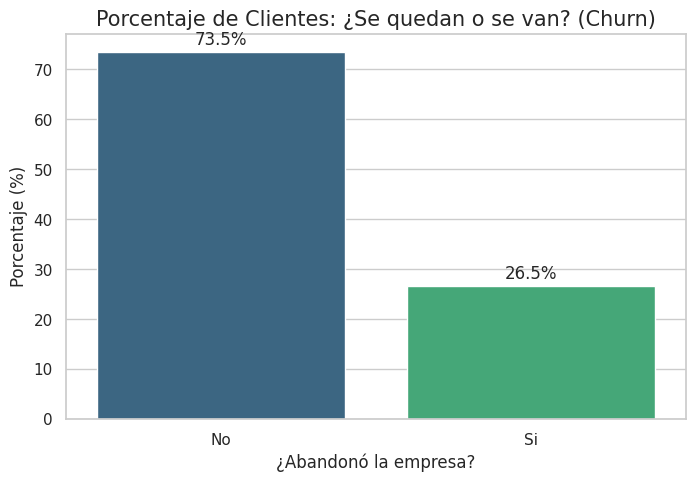

In [13]:
# Calculamos la proporción de Churn
churn_counts = datos_telecom['Churn'].value_counts(normalize=True) * 100

# Creamos el gráfico corrigiendo el uso de palette y hue
plt.figure(figsize=(8, 5))
ax = sns.barplot(
    x=churn_counts.index,
    y=churn_counts.values,
    hue=churn_counts.index,  # Asignamos x a hue para evitar el aviso
    palette='viridis',
    legend=False             # Quitamos la leyenda porque no es necesaria aquí
)

# Añadimos títulos y etiquetas
plt.title('Porcentaje de Clientes: ¿Se quedan o se van? (Churn)', fontsize=15)
plt.ylabel('Porcentaje (%)')
plt.xlabel('¿Abandonó la empresa?')

# Añadimos el número del porcentaje sobre las barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

plt.show()

### **3.3 Recuento de evasión por variables categóricas**
###Exploramos cómo se distribuye la evasión según el tipo de contrato y otros perfiles, para orientar acciones estratégicas.

**1. Gráfico de Tipo de Contrato**

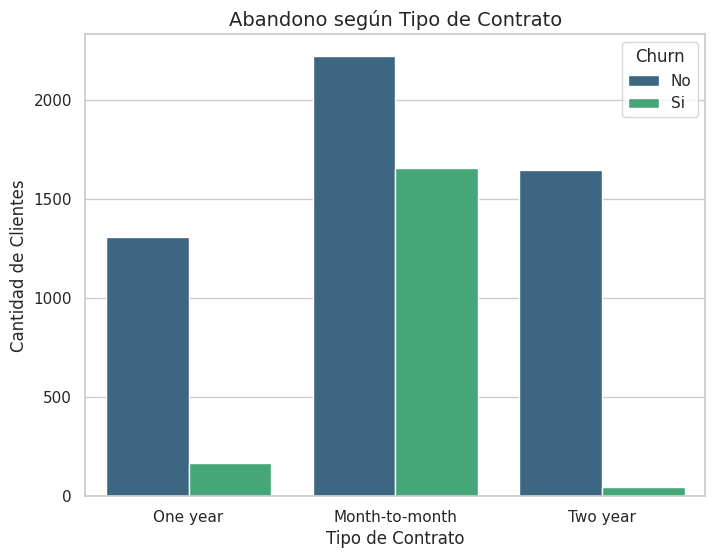

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Código del gráfico 1
plt.figure(figsize=(8, 6))
sns.countplot(data=datos_telecom, x='Contract', hue='Churn', palette='viridis')
plt.title('Abandono según Tipo de Contrato', fontsize=14)
plt.xlabel('Tipo de Contrato', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)

# Guardamos el archivo
plt.savefig('grafico_contrato.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

**2. Gráfico de Método de Pago**

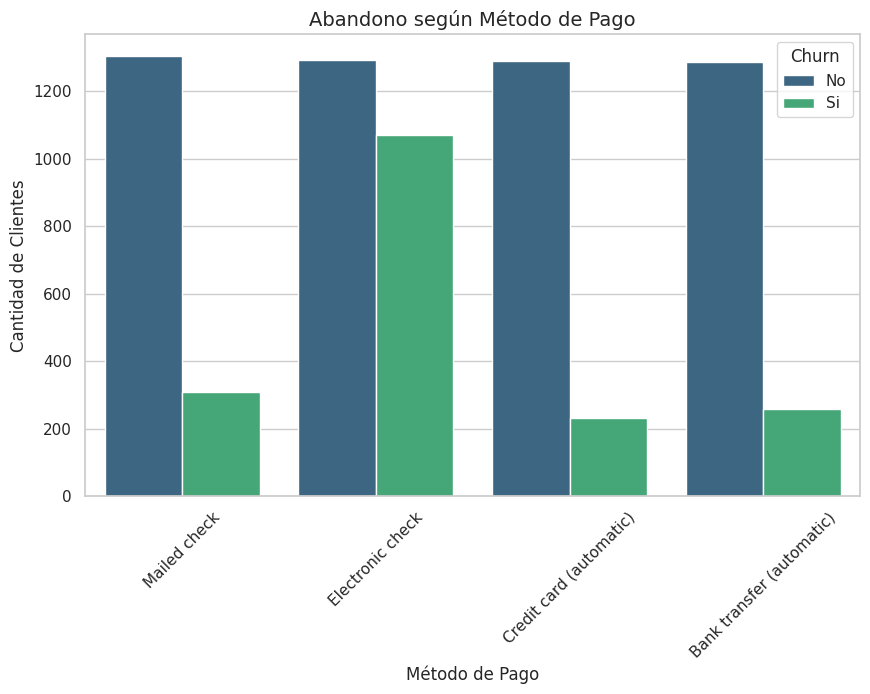

In [18]:
plt.figure(figsize=(10, 6))
sns.countplot(data=datos_telecom, x='PaymentMethod', hue='Churn', palette='viridis')
plt.title('Abandono según Método de Pago', fontsize=14)
plt.xlabel('Método de Pago', fontsize=12)
plt.ylabel('Cantidad de Clientes', fontsize=12)
plt.xticks(rotation=45) # Rotación para que los nombres largos no se corten

# Guardamos el archivo con nombre diferente
plt.savefig('grafico_pago.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

### **3.4 Conteo de evasión por variables numéricas**
### Investigamos si el tiempo de contrato (tenure) o los cargos mensuales están asociados con la decisión de cancelar el servicio.

**1. Gráfico de Permanencia (Tenure)**

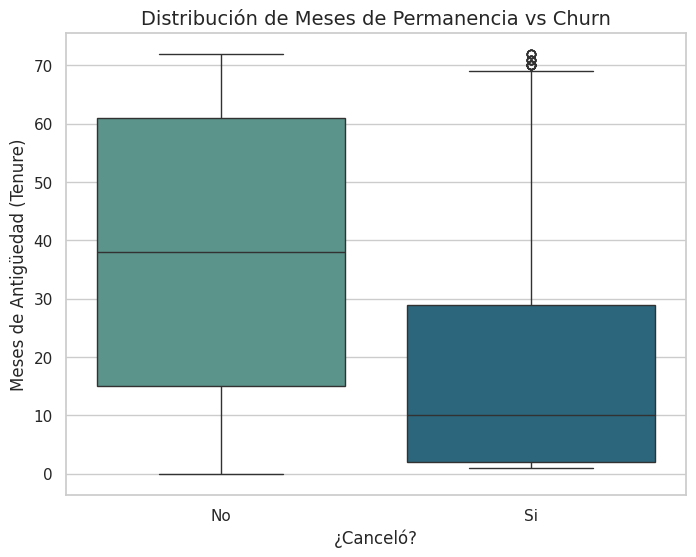

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos_telecom, x='Churn', y='tenure', hue='Churn', palette='crest', legend=False)
plt.title('Distribución de Meses de Permanencia vs Churn', fontsize=14)
plt.xlabel('¿Canceló?', fontsize=12)
plt.ylabel('Meses de Antigüedad (Tenure)', fontsize=12)

# Guardamos el archivo independiente
plt.savefig('grafico_permanencia.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

**2. Gráfico de Cargos Mensuales**

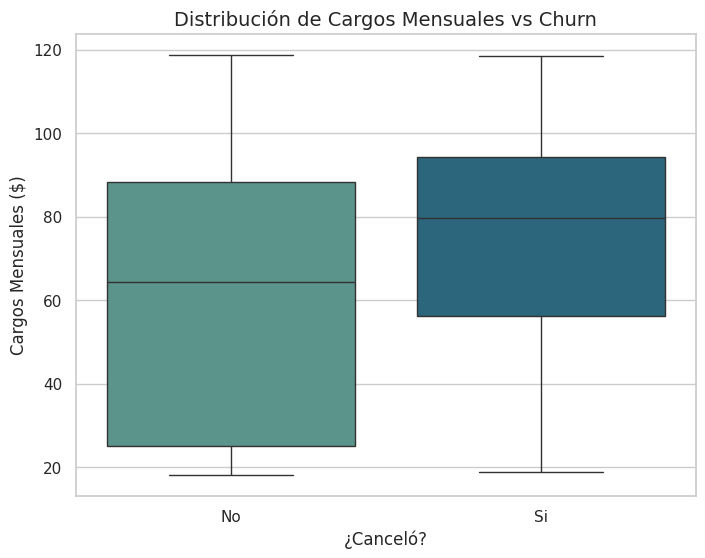

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.boxplot(data=datos_telecom, x='Churn', y='Charges.Monthly', hue='Churn', palette='crest', legend=False)
plt.title('Distribución de Cargos Mensuales vs Churn', fontsize=14)
plt.xlabel('¿Canceló?', fontsize=12)
plt.ylabel('Cargos Mensuales ($)', fontsize=12)

# Guardamos el archivo independiente con otro nombre
plt.savefig('grafico_cargos.png', bbox_inches='tight', dpi=300)
plt.show()
plt.close()

### **3.5 Análisis de Correlación**
### Identificamos matemáticamente qué factores tienen mayor relación con la evasión de clientes.

**1. Gráfico de Correlación**

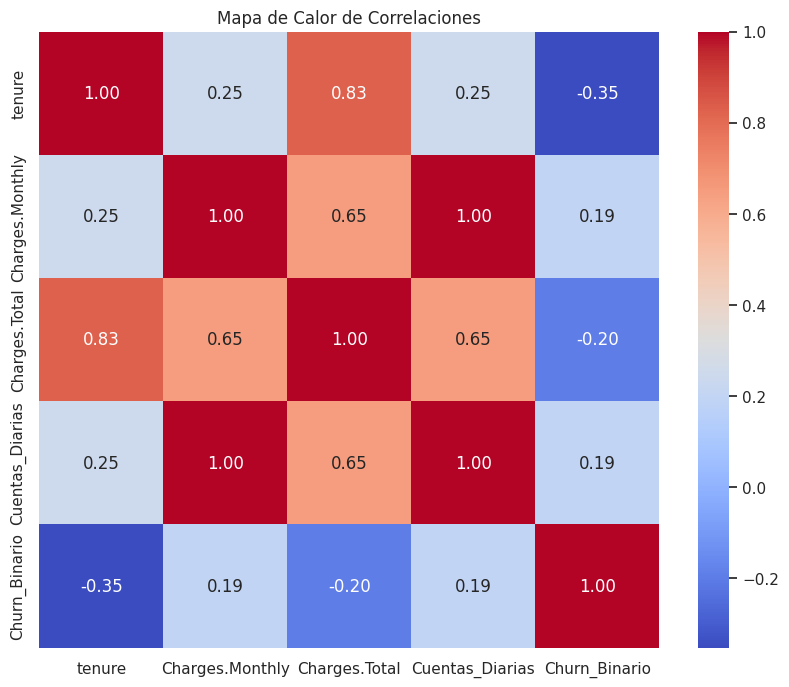

In [17]:
# Convertimos Churn a binario para correlacionar
df_corr = datos_telecom.copy()
df_corr['Churn_Binario'] = df_corr['Churn'].map({'Si': 1, 'No': 0})

# Matriz de correlación
columnas_interes = ['tenure', 'Charges.Monthly', 'Charges.Total', 'Cuentas_Diarias', 'Churn_Binario']
matriz = df_corr[columnas_interes].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matriz, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Mapa de Calor de Correlaciones')
plt.show()

#📄Informe final

🔹 **Introducción**


Este informe presenta los resultados del análisis de evasión de clientes (Churn) para Telecom X. El objetivo es identificar los factores críticos que influyen en la pérdida de suscriptores para proponer estrategias de retención efectivas.



🔹**Limpieza y Tratamiento de Datos**

El dataset fue sometido a un proceso de curaduría que incluyó:

* **Normalización:** Desglose de estructuras JSON para obtener variables independientes.

* **Tratamiento de nulos:** Eliminación de registros incompletos en la variable Churn.

* **Corrección técnica:** Se convirtió la variable Charges.Total a formato numérico.

* **Ingeniería de datos:** Creación de la métrica Cuentas_Diarias para entender el impacto económico por jornada.




🔹 **Análisis Exploratorio de Datos (EDA)**

A partir de las visualizaciones realizadas, observamos:

* **Demográficas:** Género, ciudadanos senior, socios y dependientes.

* **Servicios:** Internet (Fibra, DSL), seguridad online, soporte técnico y streaming.

* **Financieras:** Cargos mensuales, totales y permanencia (tenure).

**Hallazgos principales:**

1. **Magnitud:** El 26.5% de los clientes abandona la empresa.

2. **Vulnerabilidad:** Los clientes con contratos mes a mes representan el mayor foco de evasión. Los contratos a largo plazo (1 y 2 años) muestran una lealtad significativamente mayor.

3. **Antigüedad:** Existe una relación inversa entre la permanencia y el abandono; los clientes nuevos (bajo tenure) tienen una probabilidad mucho más alta de irse.

4. **Costos:** Los cargos mensuales más elevados están positivamente correlacionados con la evasión, lo que sugiere una posible insatisfacción con la relación costo-beneficio.



🔹 **Conclusiones e Insights**

* La **antigüedad** es el mejor protector contra la evasión. Una vez que el cliente supera el primer año, la probabilidad de abandono cae drásticamente.

* El **método de pago** y el **tipo de contrato** son los mejores predictores categóricos: el pago electrónico y los contratos mensuales son señales de alerta.

* La **limpieza de datoS** fue clave para obtener el porcentaje real de Churn, evitando sesgos por datos faltantes.

🔹**Recomendaciones**
1. **Fidelización Temprana:** Implementar campañas de bienvenida y descuentos durante los primeros 6 meses de servicio.

2. **Migración de Contratos:** Ofrecer beneficios exclusivos (como meses gratis o servicios extra) a quienes migren de contratos mensuales a anuales.

3. **Revisión de Servicios:** Promover servicios de valor agregado como Tech Support y Online Security, ya que los clientes que los poseen tienden a permanecer más tiempo.